## 4. Evaluating a machine learning model

Three ways to evaluate Scikit-Learn models/estimators: 

1. Estimator's built-in `score()` method
2. The `scoring` parameter
3. Problem-specific metric functions
    
You can read more about these here: https://scikit-learn.org/stable/modules/model_evaluation.html 

### 4.1 Evaluating a model with the `score` method

In [1]:
# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Get the data (be sure to click "raw") - https://github.com/mrdbourke/zero-to-mastery-ml/blob/master/data/heart-disease.csv 
heart_disease = pd.read_csv("https://raw.githubusercontent.com/mrdbourke/zero-to-mastery-ml/master/data/heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
# Setup random seed
np.random.seed(42)

# Make the data
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100)

# Fit the model to the data (training the machine learning model)
clf.fit(X_train, y_train)

RandomForestClassifier()

In [4]:
#The highest value for the .score() method is 1.0  , the lowest is 0.0
clf.score(X_train, y_train)
#the default score method for a classfication algorithm is accuracy 
#of course we have to convert into percentage if we want accuracy into percentage so 1.0 is 100% accuracy so if 0.8 then 80% accuracy


1.0

In [5]:
#why is our model getting 1.0 on the training data well it's had exposure to all fo the the training features and all of the training labels and so if the model is powerful enought , it iwll achieve a perfect socre on the traing data because its able to split data in our case, it's binary zero and one it's able to predcit from all of the X train value to  predict perfectly all o fthe y train values  

In [6]:
clf.score(X_test , y_test)

0.8524590163934426

In [7]:
#now it might be a differnet scenario for the test data it hasn't seen the test sample  learn patterns in data that we have existing to make predcitions, quality predictions on data that data we have't seen before
# the core is less on unseen data

In [8]:
#the training score is usually sometimes quite a bit higher than the test score, but they should be relatively close but the training will generally be higher than the testing score and if you ever get a perfect test score, like 100% accuracy or something like that , always be skeptical go back and check your data but if we made our model a little bit worse

Let's use the 'score()' on our regression problem

In [9]:
# Get California Housing dataset
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [10]:

housing_df["target"] = housing["target"]
housing_df.head()

NameError: name 'housing_df' is not defined

In [ ]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

# Create the data
X = housing_df.drop("target", axis=1)
y = housing_df["target"]

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create model instance
model = RandomForestRegressor(n_estimators=1000)

# Fit the model to the data
model.fit(X_train, y_train)

In [ ]:
model.score(X_test , y_test) # if we want to have a look at what the metric here that's being used for the score method how might we do that shift + tab

In [ ]:
y_test.mean() #if we go the mean of that mean, if every single sample in our predictions redicted that we'd get an r-squared value of zero

#we've seen how to quickly get a sniff of how our machine learning model is doing and evaluate it using the score method and that'll return a default evalutation metric depending on the problem we're working in regression it's returns ot the coeffiecient of determination and in classfication it returns the mean accuracy

## However, when you get furhter into a problem, it's likely you'll want to start using osme more powerful metrics to evaluate your mdoel's performance 

## 4.2 Evaluating a model using the scoring parmaeter

In [ ]:
# Import cross_val_score from the model_selection module
from sklearn.model_selection import cross_val_score

# Import the RandomForestClassifier model class from the ensemble module
from sklearn.ensemble import RandomForestClassifier

# Setup random seed
np.random.seed(42)

# Split the data into X (features/data) and y (target/labels)
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate the model (on the training set)
clf = RandomForestClassifier()

# Call the fit method on the model and pass it training data
clf.fit(X_train, y_train);

In [ ]:
# Using score()
clf.score(X_test, y_test)

In [ ]:
# Using cross_val_score()
cross_val_score(clf, X, y)

In [ ]:
#cross val return the array and score returns a single number 

## so cross val score returns the array because what cross validation does ? 
## it does 5 different split  > cross validation trained on 5 differnet versions of training data and evaluated on 5 different versions of the test data
##so whats the purpose of this ? 
>well as you could imagine, if we're only training one model, it could be a lucky split , like say this 80% of rows say that hasd a whole bunch of information and the model was able to learn really well on these 80 rows, on these 80 patient records and then it got a really good score on this test set is that a tru reflection of how our model woruld understand the data or figure out the patterns in the data well not really because it just luck somehow easy patient record get and get a good score we are thinking our model is good as it is not
so that where corss validation comes into play it aims to provide a soultuin to not training on all the data and avoding getting those lucky scores on just a single split of data so it will create 5 differnt split so no matter what our model is going to e triaaning on all of the data and evaluate on all of the data
so it gives a number of 5 array
it is going to differetn 5 fold split you can do 100 fold also but the recommened is 5 
<img src = "./Screenshot (87).png" />

In [ ]:
# Using cross_val_score()
cross_val_score(clf, X, y , cv = 10)

Since we set `cv=5` (5-fold cross-validation), we get back 5 different scores instead of 1.

Taking the mean of this array gives us a more in-depth idea of how our model is performing by converting the 5 scores into one.

Notice, the average `cross_val_score()` is slightly lower than single value returned by `score()`.

 and so what we do here is to figure out a more ideal performance metric or evaluation metric for our model is that we can take the average of this 5 score


In [ ]:

np.random.seed(42)

# Single training and test split score
clf_single_score = clf.score(X_test, y_test)

# Take mean of 5-fold cross-validation
clf_cross_val_score = np.mean(cross_val_score(clf, X, y, cv=5))

#Compare the two
clf_single_score, clf_cross_val_score

## >>>>>>>> in this case, if you are asked to report the accuracy of your model even though it is lower you'd prefer the cross validation metric over the non cross validation metric 

In [ ]:
cross_val_score(clf, X, y, cv=5, scoring=None) # default scoring

In [ ]:
#Scoring parmaeter set to None by default
cross_val_score(clf, X, y, cv=5, scoring=None) # default scoring         #so that means when we have scoring set to none its' going to use the default evaluation metric for cross-validation on our classifier 
#i f none a single value if none the estimate is default sccorer if available is used 
# now this is why we know that this is accuracy because if the scoring parmaeter of cross val score  is none, it uses the default scoring parmaeter of our estimate in our case  
#so that means when we have scoring set to none it's going to use the default evaluation metric for corss validation on our classifier 
#Default socring parameter of classifier = mean accuracy

# clf.score()

 # so it's going to return the same values or it might be slightly differnet, right because we haven't se tup a seed in this cell  so these value are going to be differnet to the cross cell score we see up there if we'd run it in here, we woruld have seen simlar values  

In [ ]:
#Default socring parameter of classifier = mean accuracy
clf.score()

In [ ]:
#we gona have a look on a next few vidoes some other classification model evaluation metrices we can use  with cross val score

so why we use cross validation ?
well as we so picture corss validation aim to solve not training  on all the data we are creating 5 models having model train on all of the data and avoiding getting lucky score so training on a single split and we so that in action tat clf socre is slightly higher then the cross value average score

### 4.2.1 Classification model evaluation metrics

Four of the main evaluation metrics/methods you'll come across for classification models are:

1. Accuracy
2. Area under ROC curve
3. Confusion matrix
4. Classification report

Let's have a look at each of these. We'll bring down the classification code from above to go through some examples.

## Accuracy

In [ ]:
heart_disease.head()

In [ ]:
# Import cross_val_score from the model_selection module
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

import numpy as np
np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]



clf = RandomForestClassifier(n_estimators=100)
coss_val_score = cross_val_score(clf , X , y , cv=5)


In [ ]:
np.mean(coss_val_score)

In [ ]:
# Accuracy as percentage
print(f"Heart Disease Classifier Cross-Validated  Accuracy: {np.mean(coss_val_score) * 100:.2f}%")

In [ ]:
#accuracy is saying given a random sample that the model hasn't seen before how likely to predict the right label

In [ ]:
#we just cover accuracy so you might be thinking why just not leve that as we start to go through other matrix here you will start to understand why  might be important to get few differnet evaluation metrix rather then just accuracy


#### Area Under Receiver Operating Characteristic (ROC) Curve (AUC) Curve
>now what does roc curve measure a rock curve is a comparision of a models true positive rate aka TPR versus a model's 
false postitive rate


If this one sounds like a mouthful, its because reading the full name is.

It's usually referred to as AUC for Area Under Curve and the curve they're talking about is the Receiver Operating Characteristic or ROC for short.

So if hear someone talking about AUC or ROC, they're probably talking about what follows.



ROC curves are a comparison of true postive rate (tpr) versus false positive rate (fpr).

For clarity:
* True positive = model predicts 1 when truth is 1
* False positive = model predicts 1 when truth is 0
* True negative = model predicts 0 when truth is 0
* False negative = model predicts 0 when truth is 1

Now we know this, let's see one. Scikit-Learn lets you calculate the information required for a ROC curve using the [`roc_curve`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve) function.

## Area under the reciever operating characteristic curve (AUG/ROC)

In [ ]:
#Create X_test ... etc
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2)

In [12]:
from sklearn.metrics import roc_curve

#FIt the classifier
clf.fit(X_train , y_train)

# Make predictions with probabilities
y_probs = clf.predict_proba(X_test)

y_probs[:10], len(y_probs)


# ROC curves are a comparison of true postive rate (tpr) versus false positive rate (fpr)

(array([[0.87, 0.13],
        [0.4 , 0.6 ],
        [0.4 , 0.6 ],
        [0.92, 0.08],
        [0.21, 0.79],
        [0.16, 0.84],
        [0.42, 0.58],
        [0.95, 0.05],
        [0.98, 0.02],
        [0.48, 0.52]]),
 61)

In [13]:
# Keep the probabilites of the positive class only


y_probs_positive = y_probs[:, 1]
y_probs_positive[:10]

array([0.13, 0.6 , 0.6 , 0.08, 0.79, 0.84, 0.58, 0.05, 0.02, 0.52])

In [14]:
# Calculate fpr, tpr and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)

# Check the false positive rate
fpr  

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.03448276, 0.03448276, 0.03448276, 0.06896552,
       0.06896552, 0.10344828, 0.10344828, 0.13793103, 0.13793103,
       0.17241379, 0.17241379, 0.24137931, 0.4137931 , 0.48275862,
       0.51724138, 0.72413793, 0.82758621, 0.93103448, 1.        ])

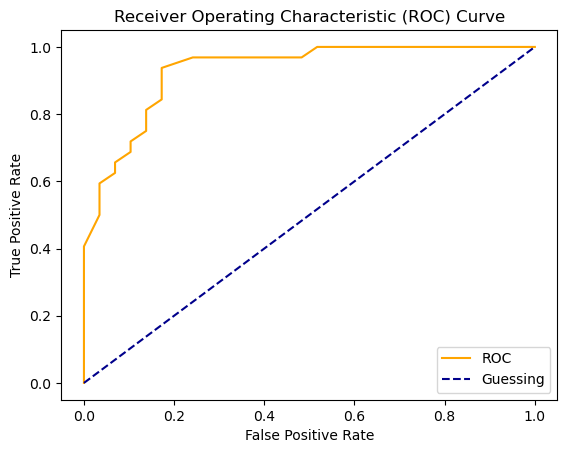

In [15]:
#so looking at this doesn't make any sense but plotting it and seeing the roc curve acual roc curve gona make sense
#just see an example how we might create roc curve plotting function      

import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    """
    Plots a ROC curve given the false positve rate (fpr) and 
    true postive rate (tpr) of a classifier.
    """
    # Plot ROC curve
    plt.plot(fpr, tpr, color='orange', label='ROC')
    # Plot line with no predictive power (baseline)
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--', label='Guessing')
    # Customize the plot
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()
    
plot_roc_curve(fpr, tpr) 

#if the false postive rate is 0.6 then the true postive rate will became 1.0
the maximum score we can get here is 1.0 up here this model here going from  corner to corner is guessing can you guess where most the ideal rock curve might end up if this is guessing and our model is doing far better then guessing by getting about 80% 85% something like that

In [20]:

#auc score are under curve what is auc score ?
#auc stand for area under curve it is the area under the curve  if you remove the guessing curve for a second curve the areea occupie by the curve is the auc are under curve
#it can goes up to 1.0
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_probs_positive)

0.929956896551724

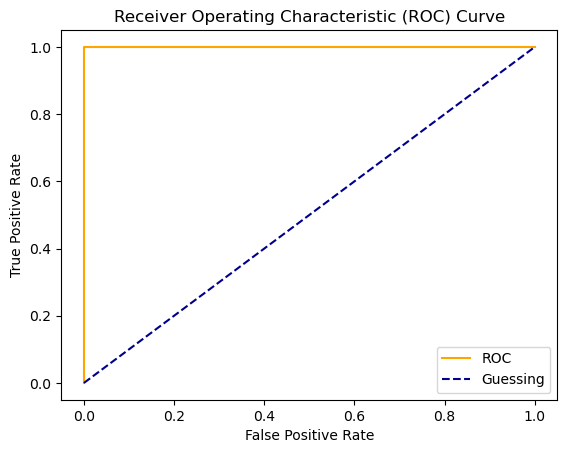

In [18]:
#lets check the perfect roc curve  i have previously said it can go to 1.0
# the are under the curve will be 1.0 auc will be 1.0 we just disccus that 
# but so in reality, a perfect rock curve is very unlikely that means you've got a perfect model it's got no flase positives everything's a true postive
# Plot perfect ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_test)
plot_roc_curve(fpr, tpr)
#themain details ehre that a rock curve is predicting is  a ture positive rate versus a false postive rate
#the main metric you can use to boil it down rathen than just being a curve , you can use the auc score

In [19]:
# Perfect ROC AUC score
roc_auc_score(y_test, y_test)

1.0

In reality, a perfect ROC curve is unlikely.

#### Confusion matrix
The next way to evaluate a classification model is by using a [confusion matrix](https://en.wikipedia.org/wiki/Confusion_matrix). 

A confusion matrix is a quick way to compare the labels a model predicts and the actual labels it was supposed to predict. In essence, giving you an idea of where the model is getting confused.

In [21]:
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(X_test)

confusion_matrix(y_test, y_preds)

array([[24,  5],
       [ 3, 29]], dtype=int64)

Again, this is probably easier visualized.

One way to do it is with `pd.crosstab()`.

In [22]:
#visualize confusin matrix with pd.crosstab()
pd.crosstab(y_test, 
            y_preds, 
            rownames=["Actual Label"], 
            colnames=["Predicted Label"])

Predicted Label,0,1
Actual Label,,
0,24,5
1,3,29


In [23]:
#our model has predicted 0 and 1 are the predicted lable #the row are the actual lables and the columns are the predictive labels
#in this case actual lable is o and pri0dictive label is 0 we have 24 examples and where the preditive labels is 1 and the acutal labels is 1 we have 24 examples


In [24]:
24 + 5 + 3 + 29

61

In [25]:
len(y_preds) #lets check how many prediction we have done and why 61 because we have 61 test

61

In [26]:
# why 61 because there is 61 examples on test 
len(y_test) #we have made 61 prediction because we have 61 example on test set

61

In [27]:
#other thing is that in actual label 2 nd column we can see 0 it is because the actual label of 5 data set is 0 but it predicts 1 therefore
#a$#the acutal label is 1 but it predict 0 in 3 data set

## hence confusin metrix came here these example there our model is being confusion  thes example our model is getting confused to prediciting 0 with actual  label is 1 or prdicting 1 where the actual is 0

<img src = "./Screenshot (88).png" />

Make our confusion matrix more visual with  seaborn's heatmap
sea born is a visualization library that is built on the top of matplotlib and it is prettry relatively easy to use

In [33]:
#how to install a conda package into the current environment from a jupyter notebook 
import sys #let us acces our computer gives us to acces system
!conda install --yes --prefix (sys.prefix) seaborn


EnvironmentLocationNotFound: Not a conda environment: C:\Users\Learn To Earn\Documents\GitHub\Machine-Learning-Data-Science\fScikitlearn Creating Machine Learning Models\(sys.prefix)



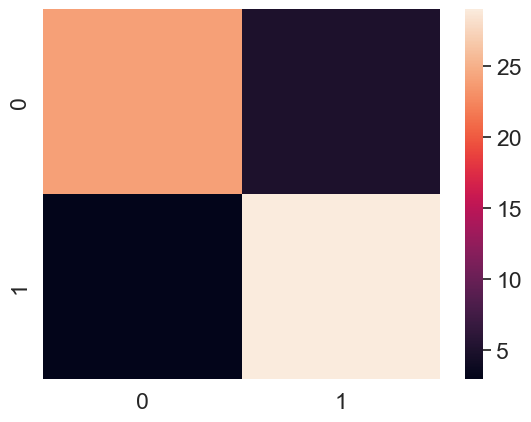

In [35]:
#Make our confusion matrix more visual with Seaborn's heatmap()

import seaborn as  sns

#Set the font scale
sns.set(font_scale=1.5)

#create a confusion matrix
conf_mat = confusion_matrix(y_test , y_preds)

#Flot it using Seaborn
sns.heatmap(conf_mat);

In reality, a perfect ROC curve is unlikely.

#### Confusion matrix
The next way to evaluate a classification model is by using a [confusion matrix](https://en.wikipedia.org/wiki/Confusion_matrix). 

A confusion matrix is a quick way to compare the labels a model predicts and the actual labels it was supposed to predict. In essence, giving you an idea of where the model is getting confused.

In [36]:

from sklearn.metrics import confusion_matrix

y_preds = clf.predict(X_test)

confusion_matrix(y_test, y_preds)

array([[24,  5],
       [ 3, 29]], dtype=int64)

In [37]:
pd.crosstab(y_test, 
            y_preds, 
            rownames=["Actual Label"], 
            colnames=["Predicted Label"])

Predicted Label,0,1
Actual Label,,
0,24,5
1,3,29


####new version this is a new version 



## creating a confusion matrix using scikit-learn
to use the new methods of creating a confusion matrix with scikit-learn you will need sklearnversion 1.0+


In [41]:
import sklearn
sklearn.__version__

'1.2.1'

Creating a confusion matrix using Scikit-Learn¶
Scikit-Learn has multiple different implementations of plotting confusion matrices:

sklearn.metrics.ConfusionMatrixDisplay.from_estimator(estimator, X, y) - this takes a fitted estimator (like our clf model), features (X) and labels (y), it then uses the trained estimator to make predictions on X and compares the predictions to y by displaying a confusion matrix.
sklearn.metrics.ConfusionMatrixDisplay.from_predictions(y_true, y_pred) - this takes truth labels and predicted labels and compares them by displaying a confusion matrix.
Note: Both of these methods/classes require Scikit-Learn 1.0+. To check your version of Scikit-Learn run:

import sklearn
sklearn.__version__
If you don't have 1.0+, you can upgrade at: https://scikit-learn.org/stable/install.html

In [44]:
#need trained or fitted estimator
clf

RandomForestClassifier()

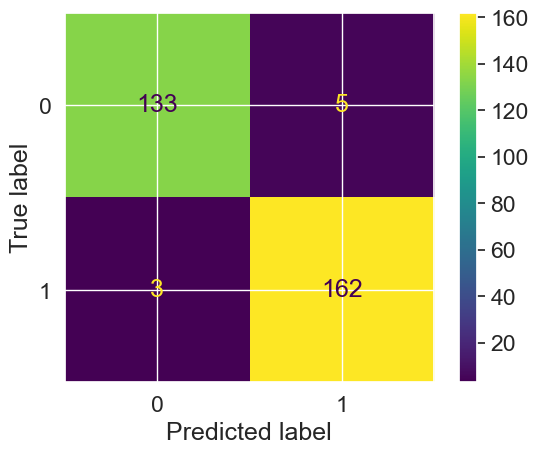

In [46]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(estimator=clf, X=X, y=y);

         #   above version takes y true and y predic   just like corss tab before you have predcition ready to go but in this you don't have to ready for prediction in this confusion matrxi you don't need  

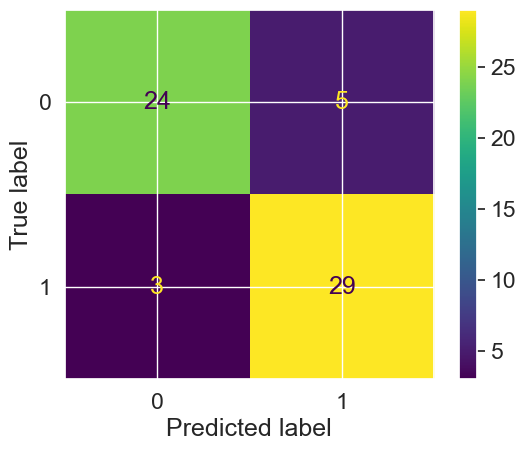

In [47]:
# Plot confusion matrix from predictions
ConfusionMatrixDisplay.from_predictions(y_true=y_test, 
                                        y_pred=y_preds);

## Classification Report 

#### Classification report

The final major metric you should consider when evaluating a classification model is a classification report.

A classification report is more so a collection of metrics rather than a single one.

You can create a classification report using Scikit-Learn's [`classification_report()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) function.

Let's see one.

In [49]:
from sklearn.metrics import classification_report

#again comparing true lable of the data vs the prediction that our model has made

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.83      0.86        29
           1       0.85      0.91      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



<img src = "./Screenshot (90).png" />